# Interface with Python, R, matlab
One of the main advantages of Julia is its ability to easily interface with other programming languages, making it an excellent tool for scientific computing and data analysis. In this session, we will explore how to interface Julia with Python, R, and MATLAB.



## Interfacing with Python

Two packages are available to call Python functions and objects from within Julia
- [PythonCall.jl](https://github.com/cjdoris/PythonCall.jl)
- [PyCall.jl](https://github.com/JuliaPy/PyCall.jl)



### What are the main differences?

|PythonCall | PyCall
|-|-|
PythonCall installs **dependencies into a separate Conda environment for each Julia project**. This means each Julia project can have an isolated set of Python dependencies. | Uses a **global Python installation**. User can still use a different version of Python than the default
supports a wider range of conversions between Julia and Python | 
directly wraps the mutable object. This means that modifying the converted object modifies the original, and conversion is faster. | copies mutable objects when converting
PythonCall does not usually automatically convert results to Julia values, but leaves them as Python objects. **This means that indexing with Python starts with 0!**| More seamless integration with Julia types, but may not be type-stable.
supports Julia 1.6.1+ and Python 3.7+ | supports Julia 0.7+ and Python 2.7+



## PythonCall

### Conda environment
Let's install `matplotlib` and `panda` in the Conda environment, and use it within Julia
```julia
julia> using CondaPkg

julia> # press ] to enter the Pkg REPL

pkg> conda add matplotlib panda
```
This creates a CondaPkg.toml file in the active project specifying the dependencies, just like a Project.toml specifies Julia dependencies. Commit this file along with the rest of the project so that dependencies are automatically installed for everyone using it.


### Getting started with `PythonCall`

Creating a numpy array



In [1]:
cd(@__DIR__)
using PythonCall
# importing Python modules
np = pyimport("numpy")
a = np.array([1,2,3])

    CondaPkg Found dependencies: /Users/victorboussange/ETHZ/PostDoc_ELE/teaching/WSL_workshop_Julia/material/Day2/21_interface/CondaPkg.toml
    CondaPkg Found dependencies: /Users/victorboussange/.julia/environments/v1.8/CondaPkg.toml
    CondaPkg Found dependencies: /Users/victorboussange/.julia/packages/PythonCall/ZzOaq/CondaPkg.toml
    CondaPkg Dependencies already up to date


Python ndarray: array([1, 2, 3])


Here's an example of how you can use Pandas and Seaborn to visualize the iris dataset.


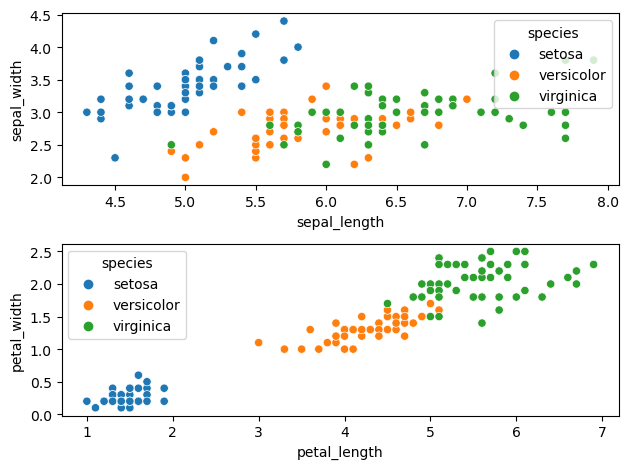

In [3]:

pd = pyimport("pandas")
plt = pyimport("matplotlib.pyplot")
sns = pyimport("seaborn")

# importing the dataset and putting 
# it in a nice DataFrame from the DataFrames.jl package
using CSV, DataFrames
iris_df = DataFrame(CSV.File("iris_data.csv"))

# converting the `DataFrame` into a Panda DataFrame
df_pd = pytable(iris_df)

# Note the 0 indexing!
fig, axs = plt.subplots(2)
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df_pd, ax=axs[0])

sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=df_pd, ax=axs[1])
fig.tight_layout()
display(fig)




### Further references
Check [the very nice guide](https://cjdoris.github.io/PythonCall.jl/stable/pythoncall/) of PythonCall.



## Interfacing with R

With R, only one package for the interface:
- [RCall](https://github.com/JuliaInterop/RCall.jl)




### Several Ways to use RCall

RCall provides multiple ways to allow R interacting with Julia. 

- R REPL mode
- [`@rput`](@ref) and [`@rget`](@ref) macros
- `R""` string macro
- RCall API: [`reval`](@ref), [`rcall`](@ref), [`rcopy`](@ref) and [`robject`](@ref) etc.
- `@rlibrary` and `@rimport` macros





#### R REPL mode
The R REPL mode allows real time switching between the Julia prompt and R prompt. Press `$` to activate the R REPL mode and the R prompt will be shown. (Press `backspace` to leave R REPL mode in case you did not know.)

```r
julia> foo = 1
1

R> x <- $foo

R> x
[1] 1
```

The R REPL mode supports variable substitution of Julia objects via the `$` symbol. It is also possible to pass Julia expressions in the REPL mode.




#### `@rput` and `@rget` macros

These macros transfer variables between R and Julia environments. The copied variable will have the same name as the original.



```julia
julia> z = 1
1

julia> @rput z
1

R> z
[1] 1

R> r = 2

julia> @rget r
2.0

julia> r
2.0
```




#### `R""`

Another way to use RCall is the [`R""`](@ref) string macro, it is especially useful in script files.



```julia
R"rnorm(10)"
```

This evaluates the expression inside the string in R, and returns the result as an [`RObject`](@ref), which is a Julia wrapper type around an R object.



The `R""` string macro supports variable substitution of Julia objects via the `$` symbol, whenever it is not valid R syntax (i.e. when not directly following a symbol or completed expression such as `aa$bb`):

```julia
x = randn(10)
R"t.test($x)"
```

A large chunk of code could be quoted between triple string quotations

```julia
y = 1
R"""
f <- function(x, y) x + y
ret <- f(1, $y)
"""
```

```julia
R"""
library(ggplot2)
data(mtcars)
p <- ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()
print(p)
"""
```



## Interfacing with MATLAB

The [MATLAB.jl](https://github.com/juliamatlab/MATLAB.jl) package provides an interface for using MATLAB® from Julia. 



## Running External Programs
In Julia, you can run external programs using the `run` function. The `run` function takes a `Cmd` object that specifies the command to run and any arguments to pass to the command. 

The backtick characters are used to create a `Cmd` object.



### Run the "ls" command on a Unix-based system
```julia
run(`ls`)
```

You can also capture the output of an external command using the read() function. Here's an example of how to capture the output of the ls command:

```julia
output = read(`ls`, String)
println(output)
```



### Interpolation
Imagine that you want to rename a file called `myfile.csv`
```julia
filename = "myfile.csv"
newfilename = "myawesomefile.csv"
run(`mv $(filename) $(newfilename)`)
```



### Further resources
See [the Julia documentation](https://docs.julialang.org/en/v1/manual/running-external-programs/) for more details.